<a href="https://colab.research.google.com/github/tomasplsek/AstroML/blob/main/03_sklearn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Machine learning for astronomers in Python**




# 3. hands-on session: **Classification problem: from *Data* to *Validation***

## **Contents**

1. Obtain (good) data
1. Preprocess the data
1. Select features & reduce dimensions
1. Find best hyperparameters
1. Closs-validate
1. Compare classifiers
1. Use all methods at once

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Obtain (good) data**

- enough datapoints
- representant dataset
- distinguishable features
- not so much omitted datapoints
- unbiased dataset

### **Random points**

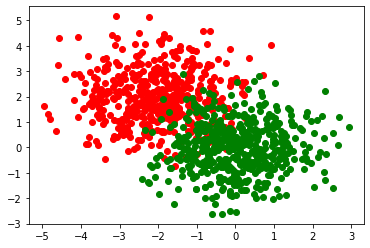

In [2]:
# generate data
dist1 = np.random.multivariate_normal([-2, 2], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

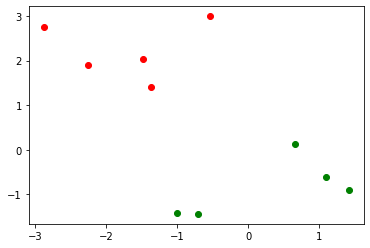

In [3]:
# generate data
dist1 = np.random.multivariate_normal([-2, 2], [[1, 0], [0, 1]], size=5)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=5)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

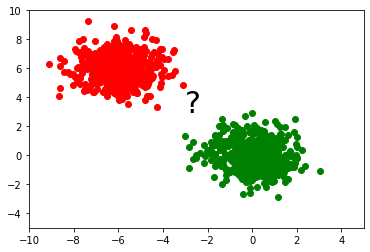

In [4]:
# generate data
dist1 = np.random.multivariate_normal([-6, 6], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

plt.xlim(-10, 5)
plt.ylim(-5, 10)
plt.text(-3, 3, "?", fontsize=30);

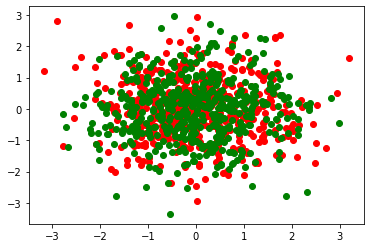

In [5]:
# generate data
dist1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

,Height,Width,Species
0,39,nan,Dog
1,49,21,Dog
2,28,15,Dog
3,38,nan,Dog
4,36,17,Dog
5,37,23,Dog
6,18,nan,Dog
7,38,29,Dog
8,29,11,Dog
9,22,nan,Dog


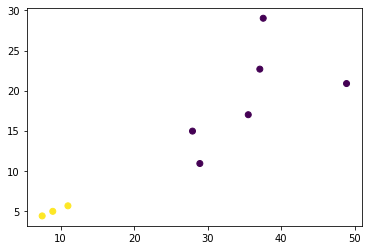

In [6]:
X1 = np.hstack((np.random.uniform(15, 50, size=10), 
                np.random.uniform(5, 20, size=4)))

X2 = np.hstack((np.random.uniform(8, 30, size=10), 
                np.random.uniform(3, 10, size=4)))

X2[::3] = np.nan

y = 10*["Dog"] + 4*["Cat"]
labels = 10*[0] + 4*[1]

plt.scatter(X1, X2, c=labels)

pd.options.display.float_format = "{:,.2g}".format
pd.DataFrame({"Height" : X1, "Width" : X2, "Species" : y})

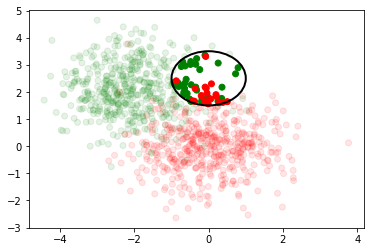

In [7]:
# generate data
dist1 = np.random.multivariate_normal([-2, 2], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)

# plot data
x0, y0, r = 0, 2.5, 1
opacities1 = np.where(np.sqrt((dist1[:,0]-x0)**2 + (dist1[:,1]-y0)**2) < r, 1, 0.1)
colors1 = np.ones((500,3)) * np.array([0, 128, 0]) / 255
colors1 = np.column_stack((colors1, opacities1))

opacities2 = np.where(np.sqrt((dist2[:,0]-x0)**2 + (dist2[:,1]-y0)**2) < r, 1, 0.1)
colors2 = np.ones((500,3)) * np.array([255, 0, 0]) / 255
colors2 = np.column_stack((colors2, opacities2))

fig, ax = plt.subplots()
ax.scatter(dist1[:, 0], dist1[:, 1], c=colors1)
ax.scatter(dist2[:, 0], dist2[:, 1], c=colors2);

circle = plt.Circle((x0, y0), 1, color="black", fill=False, lw=2)
ax.add_artist(circle);

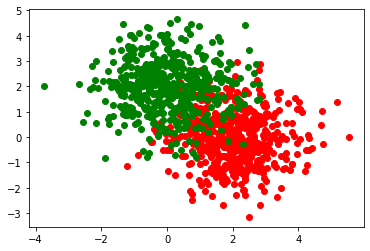

In [8]:
# generate data
dist1 = np.random.multivariate_normal([2, 0], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 2], [[1, 0], [0, 1]], size=500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

### **Random points with scikit-learn**

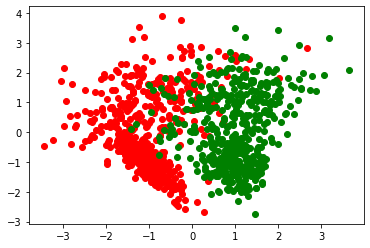

In [9]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, 
                           n_classes=2, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0, 
                           random_state=666)

i1, i2 = y == 0, y == 1

plt.scatter(X[:, 0][i1], X[:, 1][i1], color='red')
plt.scatter(X[:, 0][i2], X[:, 1][i2], color='green');

### **[Scikit-learn datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html)**

#### **Iris dataset**

![](https://www.aifunded.es/images/iris.png)

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

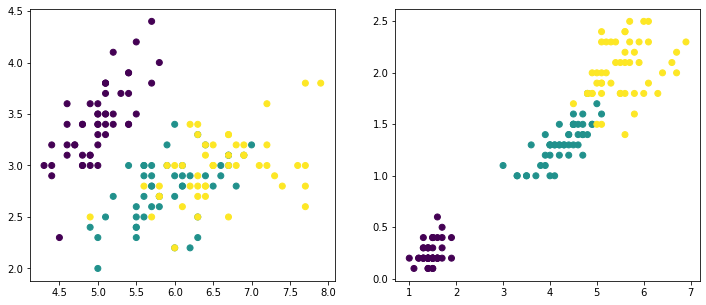

In [10]:
from sklearn.datasets import load_iris # kosatec

iris = load_iris()
X, y = iris["data"], iris["target"]

#X, y = load_iris(return_X_y = True)

i1, i2, i3 = y==0, y==1, y==2

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c=y)

iris["target_names"], iris["feature_names"]

In [11]:
!pip install corner
import corner

Defaulting to user installation because normal site-packages is not writeable


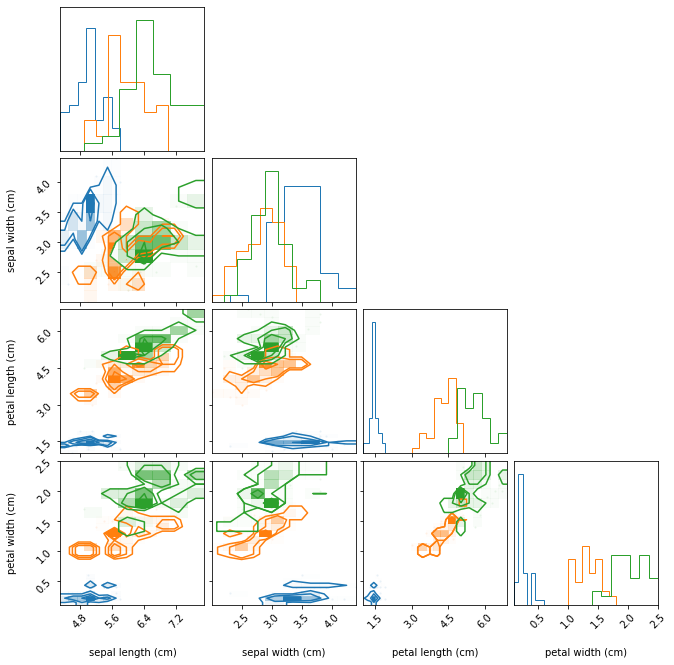

In [12]:
df = pd.DataFrame(data=iris["data"],
                  columns=iris["feature_names"])

df_1 = df[iris["target"] == 0]
df_2 = df[iris["target"] == 1]
df_3 = df[iris["target"] == 2]

kw = {"bins" : [7, 7, 7, 7]}
fig = corner.corner(df_1, color="C0", **kw)
corner.corner(df_2, fig=fig, color="C1", **kw)
corner.corner(df_3, fig=fig, color="C2", **kw);

#### **Digits**

(1797, 64)

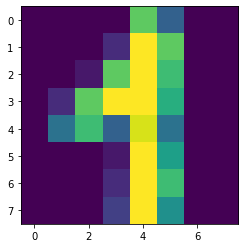

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
plt.imshow(digits.data[42].reshape(8,8));
digits.data.shape

(60000, 28, 28)

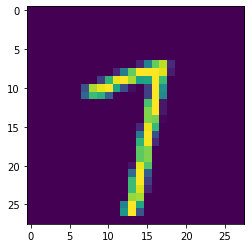

In [14]:
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

plt.imshow(x_train[42]);
x_train.shape

#### **Califoria housing prices dataset**

In [15]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = pd.DataFrame(data["data"], columns=data['feature_names'])
X["MedHouseVal"] = data["target"]

pd.reset_option("display.float_format")
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


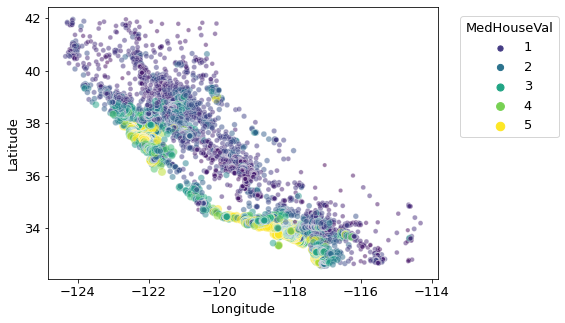

In [16]:
import seaborn as sns

plt.figure(figsize=(7,5))
plt.rc("font", size=13)
sns.scatterplot(data=X, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.04, 0.99), loc="upper left");

### **Other datasets**

[Scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html)

[Keras](https://keras.io/api/datasets/)

[Kaggle](https://www.kaggle.com/datasets)

[OpenML](https://www.openml.org/search?type=data)

### **Our dataset**

SDSS data of point sources: stars vs Quasi-stellar objects

<img src="https://cdn.mos.cms.futurecdn.net/HgaCHZDNppE6e52yeDACo6-970-80.jpg.webp" height=200>

<img src="https://earthsky.org/upl/2021/01/supermassive-black-hole-artist-e1610556964639.jpg" height=200 align=right>



In [17]:
!wget -c "https://drive.google.com/uc?id=1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB" -O "sdss_photo.csv"

--2021-10-26 09:31:31--  https://drive.google.com/uc?id=1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB
Resolving drive.google.com (drive.google.com)... 172.217.23.238, 2a00:1450:4014:80d::200e
Connecting to drive.google.com (drive.google.com)|172.217.23.238|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4lj4hkgdqgrbeoeaeeisk8069jsb89uf/1635233475000/12667160157784747384/*/1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB [following]
--2021-10-26 09:31:32--  https://doc-04-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4lj4hkgdqgrbeoeaeeisk8069jsb89uf/1635233475000/12667160157784747384/*/1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB
Resolving doc-04-2s-docs.googleusercontent.com (doc-04-2s-docs.googleusercontent.com)... 172.217.23.193, 2a00:1450:4014:80c::2001
Connecting to doc-04-2s-docs.googleusercontent.com (doc-04-2s-docs.googleusercontent.com)|172.217.23.193|

In [18]:
data = pd.read_csv("sdss_photo.csv")

## **Data preprocessing**

### What to do with the data:
- look at the data
- check data quality
- understand the data
- think of selection biases

In [19]:
data

,mag_u,mag_g,mag_r,mag_i,mag_z,target,u-g,g-r,r-i,i-z
0,19.240999,17.525999,16.840000,16.613001,16.492001,star,1.715000,0.685999,0.226999,0.121000
1,19.732000,18.339001,17.767000,17.580000,17.481001,star,1.393000,0.572001,0.187000,0.098999
2,16.120001,15.232000,14.933000,14.845000,14.827000,star,0.888000,0.299001,0.087999,0.018001
3,18.995001,18.150999,17.877001,17.747000,17.766001,star,0.844002,0.273998,0.130001,-0.019001
4,19.032000,18.112000,17.848000,17.709999,17.712000,star,0.920000,0.264000,0.138000,-0.002001
...,...,...,...,...,...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000,QSO,0.199999,0.384001,0.035999,-0.043999
863,26.433001,21.429001,20.261000,20.108000,20.073000,QSO,5.004000,1.168001,0.153000,0.035000
864,20.535999,20.200001,20.292999,19.910000,19.726000,QSO,0.335999,-0.092999,0.382999,0.184000
865,20.627001,20.583000,20.270000,20.229000,20.190001,QSO,0.044001,0.313000,0.041000,0.039000


In [20]:
data.describe().round(2)

,mag_u,mag_g,mag_r,mag_i,mag_z,u-g,g-r,r-i,i-z
count,867.00,867.00,867.00,867.00,867.00,867.00,867.00,867.00,867.00
mean,19.29,18.17,17.72,17.54,17.45,1.12,0.46,0.18,0.09
std,1.39,1.33,1.35,1.37,1.38,0.67,0.31,0.13,0.10
min,15.67,14.36,14.12,13.95,13.89,-0.95,-0.20,-0.21,-0.42
25%,18.50,17.29,16.74,16.54,16.45,0.84,0.26,0.11,0.03
50%,19.33,18.33,17.88,17.69,17.62,1.09,0.44,0.17,0.08
75%,20.02,19.09,18.76,18.61,18.52,1.46,0.60,0.25,0.14
max,26.43,25.17,21.14,20.72,20.91,5.06,4.03,1.21,0.56


#### task 1: **create `X` and `y`**

In [21]:
cols = data.columns
cols = cols[["mag" in i for i in cols]]
X = data[cols]
X.columns = [i.split("_")[1] for i in X.columns]
X

,u,g,r,i,z
0,19.240999,17.525999,16.840000,16.613001,16.492001
1,19.732000,18.339001,17.767000,17.580000,17.481001
2,16.120001,15.232000,14.933000,14.845000,14.827000
3,18.995001,18.150999,17.877001,17.747000,17.766001
4,19.032000,18.112000,17.848000,17.709999,17.712000
...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000
863,26.433001,21.429001,20.261000,20.108000,20.073000
864,20.535999,20.200001,20.292999,19.910000,19.726000
865,20.627001,20.583000,20.270000,20.229000,20.190001


In [22]:
y = data["target"]
y

0      star
1      star
2      star
3      star
4      star
       ... 
862     QSO
863     QSO
864     QSO
865     QSO
866     QSO
Name: target, Length: 867, dtype: object

In [23]:
y = np.array(data["target"] == "QSO").astype('uint8')
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### task 2: **plot the data**

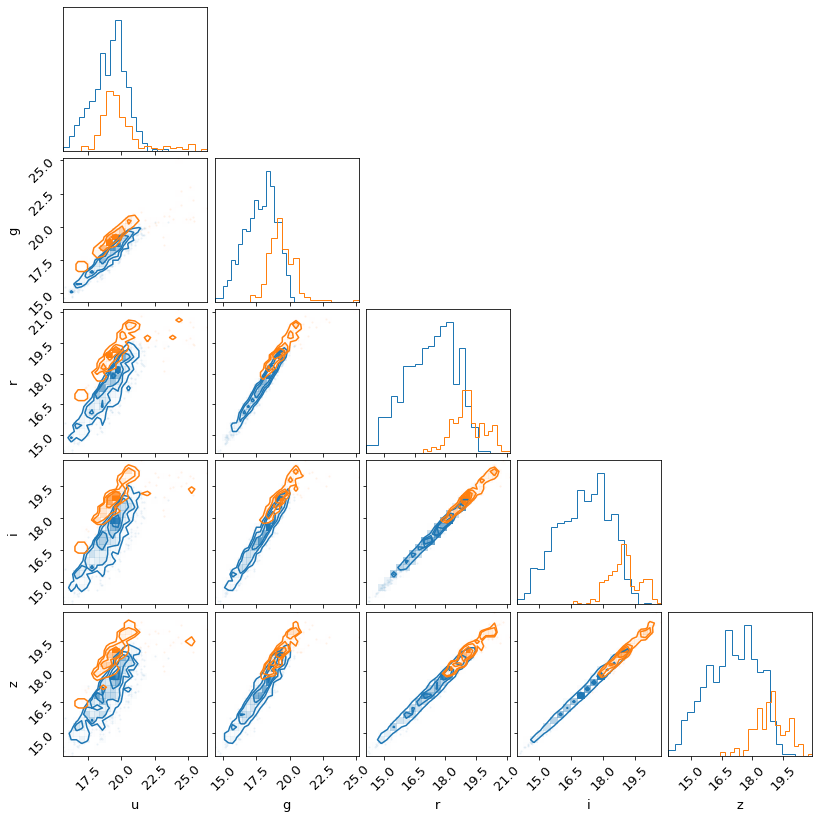

In [25]:
X1 = X[y == 0]
X2 = X[y == 1]

fig = corner.corner(X1, color="C0")
corner.corner(X2, fig=fig, color="C1");

#### task 3: **classify with SVC & test score**

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [72]:
model = SVC(kernel="linear")
model.fit(X_train, y_train)

SVC(kernel='linear')

In [73]:
y_pred = model.predict(X_test)
sum(y_pred == y_test) / len(y_pred)

0.9447004608294931

In [74]:
model.score(X_test, y_test)

0.9447004608294931

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.942     0.988     0.964       164
           1      0.956     0.811     0.878        53

    accuracy                          0.945       217
   macro avg      0.949     0.900     0.921       217
weighted avg      0.945     0.945     0.943       217



#### task 4: **rescale the data -> `X_scaled` & test score**

In [77]:
X_scaled = X.copy()
for col in X.columns:
    X_scaled[col] = (X[col] - np.mean(X[col])) / np.std(X[col])

In [78]:
X_scaled.describe().round(2)

,u,g,r,i,z
count,867.00,867.00,867.00,867.00,867.00
mean,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-2.61,-2.86,-2.65,-2.62,-2.59
25%,-0.57,-0.66,-0.72,-0.73,-0.73
50%,0.03,0.12,0.12,0.11,0.12
75%,0.53,0.69,0.77,0.78,0.77
max,5.15,5.24,2.52,2.32,2.51


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [80]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled.describe().round(2)

,u,g,r,i,z
count,867.00,867.00,867.00,867.00,867.00
mean,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-2.61,-2.86,-2.65,-2.62,-2.59
25%,-0.57,-0.66,-0.72,-0.73,-0.73
50%,0.03,0.12,0.12,0.11,0.12
75%,0.53,0.69,0.77,0.78,0.77
max,5.15,5.24,2.52,2.32,2.51


In [81]:
model = make_pipeline(StandardScaler(),
                      SVC(kernel="linear"))

model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [82]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.942     0.988     0.964       164
           1      0.956     0.811     0.878        53

    accuracy                          0.945       217
   macro avg      0.949     0.900     0.921       217
weighted avg      0.945     0.945     0.943       217



## **Feature selection & reduce dimensions**

In [83]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [86]:
X_reduced = SelectKBest(chi2, k=3).fit_transform(X, y)
X_reduced[0]

array([16.84000015, 16.61300087, 16.49200058])

In [87]:
X.loc[0]

u    19.240999
g    17.525999
r    16.840000
i    16.613001
z    16.492001
Name: 0, dtype: float64

In [88]:
from sklearn.decomposition import PCA

In [89]:
pca = PCA(n_components=2)
X_n = pca.fit_transform(X)
#pca.explained_variance_ratio_

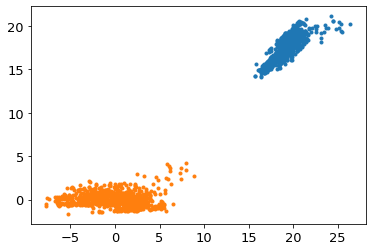

In [90]:
plt.plot(X.u, X.r, ".")
plt.plot(X_n[:,0], X_n[:,1], ".")

In [91]:
from sklearn.ensemble import ExtraTreesClassifier

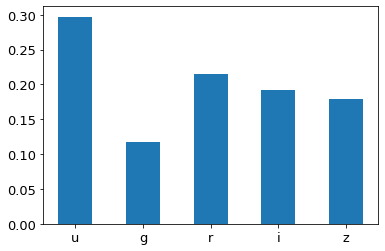

In [102]:
clf = ExtraTreesClassifier(random_state=42).fit(X,y)
plt.bar(np.arange(5), clf.feature_importances_, 0.5)
plt.xticks(np.arange(5), X.columns);

In [93]:
X_new = X.copy()
X_new["u-g"] = X.u - X.g
X_new["u-r"] = X.u - X.r
X_new["u-z"] = X.u - X.z
X_new["i-z"] = X.i - X.z

X_new

,u,g,r,i,z,u-g,u-r,u-z,i-z
0,19.240999,17.525999,16.840000,16.613001,16.492001,1.715000,2.400999,2.748999,0.121000
1,19.732000,18.339001,17.767000,17.580000,17.481001,1.393000,1.965000,2.250999,0.098999
2,16.120001,15.232000,14.933000,14.845000,14.827000,0.888000,1.187001,1.293001,0.018001
3,18.995001,18.150999,17.877001,17.747000,17.766001,0.844002,1.118000,1.229000,-0.019001
4,19.032000,18.112000,17.848000,17.709999,17.712000,0.920000,1.184000,1.320000,-0.002001
...,...,...,...,...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000,0.199999,0.584000,0.576000,-0.043999
863,26.433001,21.429001,20.261000,20.108000,20.073000,5.004000,6.172001,6.360001,0.035000
864,20.535999,20.200001,20.292999,19.910000,19.726000,0.335999,0.243000,0.809999,0.184000
865,20.627001,20.583000,20.270000,20.229000,20.190001,0.044001,0.357000,0.437000,0.039000


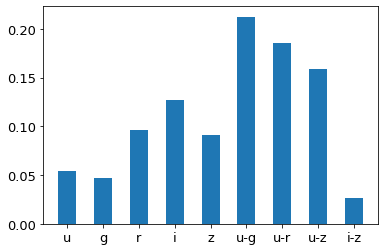

In [101]:
clf = ExtraTreesClassifier(random_state=42).fit(X_new,y)
plt.bar(np.arange(len(X_new.columns)), clf.feature_importances_, 0.5)
plt.xticks(np.arange(len(X_new.columns)), X_new.columns);

In [103]:
X_new2 = X_new.copy()
X_new2["u/g"] = X.u / X.g
X_new2["g/r"] = X.g / X.r
X_new2["r/i"] = X.r / X.i
X_new2["i/z"] = X.i / X.z

X_new2

,u,g,r,i,z,u-g,u-r,u-z,i-z,u/g,g/r,r/i,i/z
0,19.240999,17.525999,16.840000,16.613001,16.492001,1.715000,2.400999,2.748999,0.121000,1.097855,1.040736,1.013664,1.007337
1,19.732000,18.339001,17.767000,17.580000,17.481001,1.393000,1.965000,2.250999,0.098999,1.075958,1.032195,1.010637,1.005663
2,16.120001,15.232000,14.933000,14.845000,14.827000,0.888000,1.187001,1.293001,0.018001,1.058298,1.020023,1.005928,1.001214
3,18.995001,18.150999,17.877001,17.747000,17.766001,0.844002,1.118000,1.229000,-0.019001,1.046499,1.015327,1.007325,0.998930
4,19.032000,18.112000,17.848000,17.709999,17.712000,0.920000,1.184000,1.320000,-0.002001,1.050795,1.014792,1.007792,0.999887
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000,0.199999,0.584000,0.576000,-0.043999,1.010500,1.020576,1.001933,0.997643
863,26.433001,21.429001,20.261000,20.108000,20.073000,5.004000,6.172001,6.360001,0.035000,1.233515,1.057648,1.007609,1.001744
864,20.535999,20.200001,20.292999,19.910000,19.726000,0.335999,0.243000,0.809999,0.184000,1.016634,0.995417,1.019237,1.009328
865,20.627001,20.583000,20.270000,20.229000,20.190001,0.044001,0.357000,0.437000,0.039000,1.002138,1.015442,1.002027,1.001932


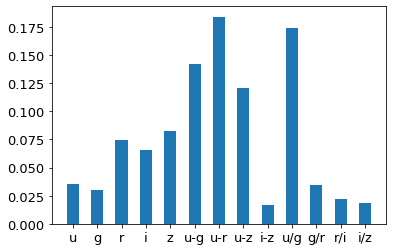

In [104]:
clf = ExtraTreesClassifier(random_state=42).fit(X_new2,y)
plt.bar(np.arange(len(X_new2.columns)), clf.feature_importances_, 0.5)
plt.xticks(np.arange(len(X_new2.columns)), X_new2.columns);

#### task 5: **create dummy column & test importance**

In [105]:
X_new3 = X.copy()

X_new3["dummy"] = np.random.normal(0, 1, size=len(X.r))
X_new3["dummy2"] = np.ones_like(X.r)

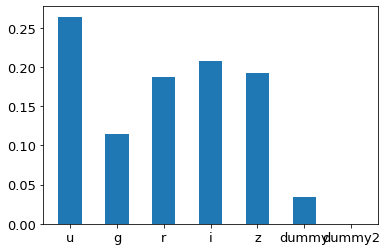

In [106]:
clf = ExtraTreesClassifier().fit(X_new3,y)
plt.bar(np.arange(len(X_new3.columns)), clf.feature_importances_, 0.5)
plt.xticks(np.arange(len(X_new3.columns)), X_new3.columns);

---

In [107]:
#cols = ["u-r", "u-g", "u/g", "u-i"]
X_train, X_test, y_train, y_test = train_test_split(X_new[["u-r"]], y, 
                                                    stratify=y, 
                                                    random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.942     0.988     0.964       164
           1      0.956     0.811     0.878        53

    accuracy                          0.945       217
   macro avg      0.949     0.900     0.921       217
weighted avg      0.945     0.945     0.943       217



## **Tune hyperparameters**

In [108]:
SVC?

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrati

#### task 6: **find SVC hyperparameters with best test score**

In [243]:
def classify(classifier):
    model = make_pipeline(StandardScaler(),
                          classifier)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.score(X_test, y_test).round(3), classifier)
    #print(classification_report(y_test, y_pred, digits=3))

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [245]:
classify(SVC(kernel="linear"))

0.954 SVC(kernel='linear')


In [246]:
classify(SVC(kernel="linear", C=10))

0.954 SVC(C=10, kernel='linear')


In [247]:
classify(SVC(kernel="linear", C=0.1))

0.926 SVC(C=0.1, kernel='linear')


In [248]:
classify(SVC(kernel="poly", degree=1))

0.949 SVC(degree=1, kernel='poly')


In [249]:
classify(SVC(kernel="rbf", C=100))

0.977 SVC(C=100)


## **Crossvalidate**

In [250]:
from sklearn.model_selection import cross_validate

In [251]:
cross_validate?

Signature:
cross_validate(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    return_train_score=False,
    return_estimator=False,
    error_score=nan,
)
Docstring:
Evaluate metric(s) by cross-validation and also record fit/score times.

Read more in the :ref:`User Guide <multimetric_cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with 

In [252]:
model = SVC(kernel="rbf", C=1000)

res = cross_validate(model, X, y, cv=10)

np.mean(res["test_score"]), np.std(res["test_score"])

(0.98040630847367, 0.012683091315102809)

### **Grid-search + crossvalidation**

In [253]:
from sklearn.model_selection import GridSearchCV

In [254]:
clf = SVC()
params = {"C" : [0.01, 0.1, 1, 10, 100],
          "kernel" : ["linear", "poly", "rbf"]}#,
          #"gamma" : ["scale", "auto"]}
model = GridSearchCV(clf, params, cv=5, n_jobs=8)
model.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=8,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']})

In [255]:
model.cv_results_

{'mean_fit_time': array([0.01130581, 0.17609205, 0.01448379, 0.00866156, 0.93532081,
        0.01159272, 0.00920672, 3.29406552, 0.00675445, 0.02118726,
        3.7194488 , 0.00606861, 0.09649119, 6.05896854, 0.00719275]),
 'std_fit_time': array([3.72700846e-04, 5.57160828e-02, 3.81620038e-04, 1.12977968e-03,
        3.25033269e-01, 7.97444443e-04, 2.21225022e-04, 1.42439362e+00,
        1.80318946e-04, 2.80487590e-03, 1.07541750e+00, 5.61562167e-04,
        1.79297152e-02, 2.82900388e+00, 3.36304313e-04]),
 'mean_score_time': array([0.00384927, 0.00264578, 0.00668602, 0.0029408 , 0.00219207,
        0.00530787, 0.00268402, 0.00215068, 0.00313625, 0.00244079,
        0.00217252, 0.0025722 , 0.00262728, 0.00219588, 0.00228748]),
 'std_score_time': array([8.02644565e-05, 5.13209455e-04, 1.93177579e-04, 1.25821921e-04,
        2.81670741e-05, 3.94727240e-04, 2.30617430e-04, 5.38861012e-05,
        1.00635305e-04, 5.03531008e-05, 9.85782146e-05, 2.07250160e-04,
        1.11039147e-04, 5.90

In [256]:
params, score = model.cv_results_["params"], model.cv_results_["mean_test_score"]

indices = np.argsort(score)

for i in indices:
    print(params[i], score[i].round(3))

{'C': 0.01, 'kernel': 'rbf'} 0.755
{'C': 0.01, 'kernel': 'linear'} 0.885
{'C': 0.1, 'kernel': 'linear'} 0.935
{'C': 0.1, 'kernel': 'rbf'} 0.946
{'C': 1, 'kernel': 'linear'} 0.946
{'C': 10, 'kernel': 'linear'} 0.948
{'C': 100, 'kernel': 'linear'} 0.949
{'C': 0.01, 'kernel': 'poly'} 0.962
{'C': 1, 'kernel': 'rbf'} 0.965
{'C': 0.1, 'kernel': 'poly'} 0.971
{'C': 1, 'kernel': 'poly'} 0.972
{'C': 100, 'kernel': 'poly'} 0.973
{'C': 10, 'kernel': 'poly'} 0.977
{'C': 100, 'kernel': 'rbf'} 0.979
{'C': 10, 'kernel': 'rbf'} 0.98


In [257]:
model.best_estimator_

SVC(C=10)

## **Compare classifiers**

In [258]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [259]:
classifiers = [MLPClassifier(max_iter=1000),
               GaussianNB(),
               DecisionTreeClassifier(),
               KNeighborsClassifier(),
               SVC(kernel="rbf", C=10)]

for classifier in classifiers:
    classify(classifier)

0.959 MLPClassifier(max_iter=1000)
0.811 GaussianNB()
0.949 DecisionTreeClassifier()
0.954 KNeighborsClassifier()
0.968 SVC(C=10)


In [260]:
clf = MLPClassifier(max_iter=1000)
params = {"hidden_layer_sizes" : [5, 10, 50, 100],
          "activation" : ["identity", "logistic", "tanh", "relu"],
          "solver" : ["sgd", "adam"]}
model = GridSearchCV(clf, params, cv=5, n_jobs=8)
model.fit(X, y)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000), n_jobs=8,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [5, 10, 50, 100],
                         'solver': ['sgd', 'adam']})

In [261]:
model.best_estimator_, model.best_score_

(MLPClassifier(activation='tanh', hidden_layer_sizes=100, max_iter=1000,
               solver='sgd'),
 0.9504285429539566)

In [262]:
%time MLPClassifier(hidden_layer_sizes=10, max_iter=1000, solver='sgd').fit(X_train, y_train).score(X_test, y_test)

CPU times: user 512 ms, sys: 437 ms, total: 948 ms
Wall time: 436 ms


0.9400921658986175

In [263]:
%time SVC(C=10).fit(X_train, y_train).score(X_test, y_test)

CPU times: user 5.44 ms, sys: 1.95 ms, total: 7.39 ms
Wall time: 6.4 ms


0.967741935483871

## **Ensemble methods**

In [264]:
from sklearn.ensemble import StackingClassifier #, RandomForestClassifier, BaggingClassifier

In [267]:
classifiers = [("MLP", MLPClassifier(max_iter=1000, random_state=42)),
               ("Bayes", GaussianNB()),
               ("DTC", DecisionTreeClassifier()),
               ("KNN", KNeighborsClassifier()),
               ("SVC", SVC(C=10))]

# train the model
model = StackingClassifier(classifiers)

res = cross_validate(model, X, y, cv=10)
np.mean(res["test_score"]), np.std(res["test_score"])

(0.9769179363806468, 0.011535216352305503)

In [266]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [269]:
model = RandomForestClassifier()

res = cross_validate(model, X, y, cv=10)
np.mean(res["test_score"]), np.std(res["test_score"])

(0.9665196471531677, 0.015037512184046462)

In [270]:
model = BaggingClassifier()

res = cross_validate(model, X, y, cv=10)
np.mean(res["test_score"]), np.std(res["test_score"])

(0.9607324244854318, 0.0157744459043129)

## **Conclusion**

In [271]:
classifiers = [("MLP", MLPClassifier(max_iter=1000, random_state=42)),
               ("Bayes", GaussianNB()),
               ("DTC", DecisionTreeClassifier()),
               ("KNN", KNeighborsClassifier()),
               ("SVC", SVC(C=10))]

# train the model
clf = StackingClassifier(classifiers)

model = make_pipeline(StandardScaler(),
                      clf)

res = cross_validate(model, X, y, cv=10)
np.mean(res["test_score"]), np.std(res["test_score"])

(0.9815290029403902, 0.01059950351622488)

# **OpenAI**

### **Compare classifiers**

In [ ]:
'''
1. generate 2 dimensional data with two distinct classes.
2. classify the data using various classifiers.
3. compare the classifiers.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# generate data
np.random.seed(0)
x1 = np.random.normal(size=(100, 2))
x2 = np.random.normal(loc=2, size=(100, 2))
x = np.vstack((x1, x2))
y = np.array([0] * 100 + [1] * 100)

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# classifiers
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC()
]

# train and test
for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

# plot
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, lw=0, cmap='RdYlGn')
plt.show()

### **Grid search**

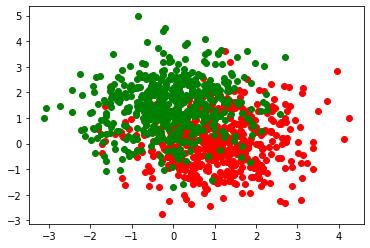

0.788
{'max_depth': 5, 'n_estimators': 30}
0.8093333333333333


In [ ]:
'''
1. generate 2 dimesional data with two distinct classes.
2. classify the data using random forest classifier.
3. find best hyperparameters using grid search.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# generate data
mean1 = [1, 0]
cov1 = [[1, 0.1], [0.1, 1]]
mean2 = [0, 1.5]
cov2 = [[1, 0.1], [0.1, 1]]
dist1 = np.random.multivariate_normal(mean1, cov1, 500)
dist2 = np.random.multivariate_normal(mean2, cov2, 500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green')
plt.show()

# prepare data for classification
data = np.zeros((1000, 3))
data[:500, :2] = dist1
data[500:, :2] = dist2
data[500:, -1] = 1

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(data[:, :2], data[:, -1])

# train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# find accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# find best hyperparameters using grid search
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7]}

grid_search = GridSearchCV(RandomForestClassifier(), params, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

In [100]:
'''
1. generate 2 dimesional data with two distinct classes.
2. scale the using min-max scaler.
3. classify the data using random forest classifier.
4. find best hyperparameters using grid search.
'''

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs

# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)

# scale the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

# define the model
model = RandomForestClassifier()

# define the grid search parameters
n_estimators = [100, 300, 500]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# define the grid
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)#, min_samples_leaf=min_samples_leaf)

# define the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5, verbose=1, return_train_score=True)

# fit the grid search
grid_result = grid_search.fit(X_train, y_train)

# summarize the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# plot the results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Mean Accuracy')
plt.show()

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  3.1min finished


Best: 0.833766 using {'max_depth': 5, 'min_samples_split': 15, 'n_estimators': 300}
0.829870 (0.026425) with: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
0.827273 (0.021963) with: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
0.828571 (0.024846) with: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 500}
0.819481 (0.025116) with: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
0.825974 (0.027055) with: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}
0.825974 (0.023735) with: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 500}
0.829870 (0.025778) with: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
0.827273 (0.028035) with: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}
0.827273 (0.026168) with: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 500}
0.825974 (0.030568) with: {'max_depth': 5, 'min_samples_split': 15, 'n_estimators': 100}
0.833766 (0.024504) with: {'max_

ValueError: ignored